/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 293s 761ms/step - accuracy: 0.5778 - loss: 0.7149 - val_accuracy: 0.6866 - val_loss: 0.5859
Epoch 2/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 277s 723ms/step - accuracy: 0.7264 - loss: 0.5394 - val_accuracy: 0.7403 - val_loss: 0.5124
Epoch 3/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 275s 711ms/step - accuracy: 0.7829 - loss: 0.4524 - val_accuracy: 0.7653 - val_loss: 0.4834
Epoch 4/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 329s 736ms/step - accuracy: 0.8442 - loss: 0.3558 - val_accuracy: 0.7403 - val_loss: 0.5494
Epoch 5/5
364/364 ━━━━━━━━━━━━━━━━━━━━ 297s 764ms/step - accuracy: 0.8864 - loss: 0.2662 - val_accuracy: 0.7833 - val_loss: 0.5404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


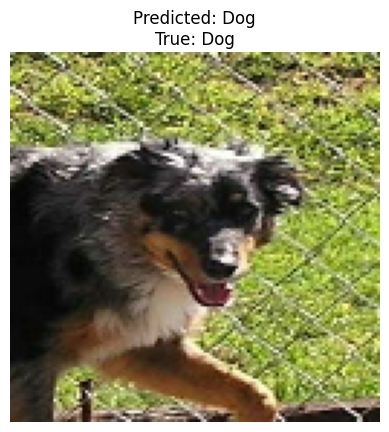

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

splits = ['train[:50%]', 'train[50:60%]']
datasets, info = tfds.load('cats_vs_dogs',
                          split=splits,
                          as_supervised=True,
                          with_info=True)
train, test = datasets[0], datasets[1]


def process(image, label):
    image = tf.image.resize(image, (128, 128))
    image = image / 255.0
    return image, label

train = train.map(process).batch(32).shuffle(1000)
test = test.map(process).batch(32)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train, epochs=5, validation_data=test)

for images, labels in test.unbatch():
    if labels.numpy() == 1:
        img = images.numpy()
        img_expanded = tf.expand_dims(img, 0)
        prediction = model.predict(img_expanded)[0][0]
        pred_label = "Dog" if prediction > 0.5 else "Cat"

        plt.imshow(img)
        plt.title(f"Predicted: {pred_label}\nTrue: Dog")
        plt.axis('off')
        plt.show()
        break
